# Data Preprocessing

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

**Scheme:**

- Select a feature space where there are no missing values : Drop all values where interested numerical feature values are 0.
- Remove all trade flows where flow is less than 100GBP (may not be economically significant and may cause outlier issues.
- Taking a log of the data to achieve smoother distribution of the data.

(notes)

- Build visualization to show that 100 GBP is outlier -- or find outlier using boxplot ?
- Show that log smoothens the data.

Selection of Feature Space and Dropping of Values
: Choosing feature space according to domain knowlegde - would be further refined by correlation analysis and other feature selection methods.

In [2]:
data_path = "/Users/prateekrao/Prateek/Repos/TradeModelling/dataset/tradhist.csv"

df = pd.read_csv(data_path)

/var/folders/qc/xp9q1kcj79315fgc2jdgwtv00000gn/T/ipykernel_20068/115515687.py:3: DtypeWarning: Columns (8,12,14,21,24,28,33,45,46,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [8]:
df.head(5)

,Unnamed: 0,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,GDP_o,SOURCE_GDP_o,GDP_d,...,CONTI_o,CONTI_d,REGIO_o,REGIO_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
0,0,NaN,ADEN,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,ADEN,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,ADEN,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,ADEN,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,ADEN,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['Unnamed: 0', 'iso_o', 'iso_d', 'year', 'FLOW', 'FLOW_0', 'SOURCE_TF',
       'GDP_o', 'SOURCE_GDP_o', 'GDP_d', 'SOURCE_GDP_d', 'SH_PRIM_o',
       'SOURCE_SH_PRIM_o', 'SH_SECD_o', 'SOURCE_SH_SECD_o', 'SH_PRIM_d',
       'SOURCE_SH_PRIM_d', 'SH_SECD_d', 'SOURCE_SH_SECD_d', 'POP_o', 'POP_d',
       'SOURCE_POP_o', 'SOURCE_POP_d', 'IPTOT_o', 'SOURCE_IPTOT_o', 'IPTOT_d',
       'SOURCE_IPTOT_d', 'XPTOT_o', 'SOURCE_XPTOT_o', 'XPTOT_d',
       'SOURCE_XPTOT_d', 'BITARIFF', 'TARIFF_o', 'SOURCE_TARIFF_o', 'TARIFF_d',
       'SOURCE_TARIFF_d', 'Distw', 'Dist_coord', 'Dist_o', 'Dist_d',
       'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol', 'Metro',
       'Colo', 'Curcol_o', 'Curcol_d', 'Evercol', 'XCH_RATE_o', 'SOURCE_XCH_o',
       'XCH_RATE_d', 'SOURCE_XCH_d', 'CONTI_o', 'CONTI_d', 'REGIO_o',
       'REGIO_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d'],
      dtype='object')

For the initial preprocessing step of selection of feature space, we will take up many attributes, and narrow it down after correlation analysis and fitting models to find best features.

In [16]:
df.iloc[91283]

Unnamed: 0        91283
iso_o               ATG
iso_d               BMU
year               1995
FLOW          1205521.8
                ...    
OECD_d              0.0
EU_o                0.0
EU_d                0.0
GATT_o              1.0
GATT_d              0.0
Name: 91283, Length: 64, dtype: object

In [46]:
feature_df = df[["iso_o", "iso_d", "year", "FLOW", "GDP_o", "GDP_d", "IPTOT_o", "IPTOT_d",
                       "XPTOT_o", "XPTOT_d", "Distw", "Dist_coord", "SeaDist_SHRT",
                        "Comlang", "Contig", "POP_o", "POP_d","OECD_o", "OECD_d", "GATT_o", "GATT_d", "CONTI_o", "CONTI_d"]]

In [47]:
feature_df

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,IPTOT_o,IPTOT_d,XPTOT_o,XPTOT_d,...,Comlang,Contig,POP_o,POP_d,OECD_o,OECD_d,GATT_o,GATT_d,CONTI_o,CONTI_d
0,NaN,ADEN,1950,NaN,NaN,NaN,NaN,4.200000e+07,NaN,3.900000e+07,...,NaN,NaN,NaN,4777.089,NaN,NaN,NaN,NaN,NaN,ASIA
1,NaN,ADEN,1951,NaN,NaN,NaN,NaN,5.000000e+07,NaN,4.500000e+07,...,NaN,NaN,NaN,4869.125,NaN,NaN,NaN,NaN,NaN,ASIA
2,NaN,ADEN,1952,NaN,NaN,NaN,NaN,5.700000e+07,NaN,4.600000e+07,...,NaN,NaN,NaN,4963.829,NaN,NaN,NaN,NaN,NaN,ASIA
3,NaN,ADEN,1953,NaN,NaN,NaN,NaN,6.100000e+07,NaN,4.100000e+07,...,NaN,NaN,NaN,5061.153,NaN,NaN,NaN,NaN,NaN,ASIA
4,NaN,ADEN,1954,NaN,NaN,NaN,NaN,6.700000e+07,NaN,4.500000e+07,...,NaN,NaN,NaN,5162.494,NaN,NaN,NaN,NaN,NaN,ASIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,ZWE,ZMB,2010,46558256.0,6.097825e+09,1.311544e+10,2.673542e+09,3.442585e+09,2.070475e+09,4.636377e+09,...,1.0,1.0,13973.897,13917.439,0.0,0.0,1.0,1.0,AFRI,AFRI
2502423,ZWE,ZMB,2011,55171376.0,6.838230e+09,1.464204e+10,3.097955e+09,4.543546e+09,2.192061e+09,5.510135e+09,...,1.0,1.0,14255.592,14343.526,0.0,0.0,1.0,1.0,AFRI,AFRI
2502424,ZWE,ZMB,2012,58787336.0,7.845171e+09,1.614464e+10,3.321382e+09,5.562818e+09,2.457760e+09,5.922680e+09,...,1.0,1.0,14565.482,14786.581,0.0,0.0,1.0,1.0,AFRI,AFRI
2502425,ZWE,ZMB,2013,77869780.0,8.629172e+09,1.793963e+10,3.244361e+09,6.515267e+09,2.243481e+09,6.770876e+09,...,1.0,1.0,14898.092,15246.086,0.0,0.0,1.0,1.0,AFRI,AFRI


As observed above, we have 25,02,427 instances of trade, ranging from 1827 - 2014.
Here, we will eliminate data instances where some of the main features, such as `iso_o`, `iso_d`, etc. are NULL, since we can't predict anything about this.

In [48]:
feature_df[pd.isna(feature_df["FLOW"])]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,IPTOT_o,IPTOT_d,XPTOT_o,XPTOT_d,...,Comlang,Contig,POP_o,POP_d,OECD_o,OECD_d,GATT_o,GATT_d,CONTI_o,CONTI_d
0,NaN,ADEN,1950,NaN,NaN,NaN,NaN,42000000.0,NaN,39000000.0,...,NaN,NaN,NaN,4777.089,NaN,NaN,NaN,NaN,NaN,ASIA
1,NaN,ADEN,1951,NaN,NaN,NaN,NaN,50000000.0,NaN,45000000.0,...,NaN,NaN,NaN,4869.125,NaN,NaN,NaN,NaN,NaN,ASIA
2,NaN,ADEN,1952,NaN,NaN,NaN,NaN,57000000.0,NaN,46000000.0,...,NaN,NaN,NaN,4963.829,NaN,NaN,NaN,NaN,NaN,ASIA
3,NaN,ADEN,1953,NaN,NaN,NaN,NaN,61000000.0,NaN,41000000.0,...,NaN,NaN,NaN,5061.153,NaN,NaN,NaN,NaN,NaN,ASIA
4,NaN,ADEN,1954,NaN,NaN,NaN,NaN,67000000.0,NaN,45000000.0,...,NaN,NaN,NaN,5162.494,NaN,NaN,NaN,NaN,NaN,ASIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502371,ZWE,ZMB,1959,NaN,351250020.0,189500000.0,150000000.0,NaN,57000000.0,117500000.0,...,1.0,1.0,3886.947,3173.000,NaN,NaN,1.0,0.0,AFRI,AFRI
2502372,ZWE,ZMB,1960,NaN,376250000.0,209500000.0,157000000.0,75000030.0,61785740.0,129285770.0,...,1.0,1.0,3752.390,3049.586,NaN,NaN,1.0,0.0,AFRI,AFRI
2502373,ZWE,ZMB,1961,NaN,397500000.0,203000000.0,155000000.0,81428610.0,71428600.0,119642910.0,...,1.0,1.0,3876.638,3142.848,0.0,0.0,1.0,0.0,AFRI,AFRI
2502374,ZWE,ZMB,1962,NaN,405000000.0,200500000.0,143000000.0,62500028.0,72857176.0,119642910.0,...,1.0,1.0,4006.262,3240.664,0.0,0.0,1.0,0.0,AFRI,AFRI


About 602k values don't have any value associated with `FLOW`, which is our target variable. Hence, we will remove these from the dataframe. We also don't have any use of values where `iso_o` and `iso_d` are NULL, hence we will remove this as well.

In [50]:
cleaned_df = feature_df.dropna()

In [51]:
cleaned_df

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,IPTOT_o,IPTOT_d,XPTOT_o,XPTOT_d,...,Comlang,Contig,POP_o,POP_d,OECD_o,OECD_d,GATT_o,GATT_d,CONTI_o,CONTI_d
9517,AFG,ALB,2001,0.000000e+00,1.710009e+09,2.820826e+09,1.178135e+09,9.277187e+08,6.461683e+07,2.456777e+08,...,0.0,0.0,20531.160,3060.173,0.0,0.0,0.0,1.0,ASIA,EUROP
9518,AFG,ALB,2002,0.000000e+00,2.754842e+09,2.959186e+09,1.636031e+09,1.001869e+09,6.455996e+07,2.350390e+08,...,0.0,0.0,21487.078,3051.010,0.0,0.0,0.0,1.0,ASIA,EUROP
9519,AFG,ALB,2003,0.000000e+00,2.807356e+09,3.519844e+09,1.286804e+09,1.134494e+09,1.405804e+08,2.853600e+08,...,0.0,0.0,22507.367,3039.616,0.0,0.0,0.0,1.0,ASIA,EUROP
9520,AFG,ALB,2004,0.000000e+00,2.886814e+09,3.995233e+09,1.189034e+09,1.253008e+09,1.665849e+08,3.348490e+08,...,0.0,0.0,23499.850,3026.939,0.0,0.0,0.0,1.0,ASIA,EUROP
9521,AFG,ALB,2005,8.425100e+02,3.451279e+09,4.487185e+09,1.358902e+09,1.438833e+09,2.111992e+08,3.475448e+08,...,0.0,0.0,24399.947,3011.487,0.0,0.0,0.0,1.0,ASIA,EUROP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502309,ZWE,ZAF,2010,1.362836e+08,6.097825e+09,2.429183e+11,2.673542e+09,5.884947e+10,2.070475e+09,5.911786e+10,...,1.0,1.0,13973.897,50771.824,0.0,0.0,1.0,1.0,AFRI,AFRI
2502310,ZWE,ZAF,2011,2.963509e+08,6.838230e+09,2.600151e+11,3.097955e+09,6.839961e+10,2.192061e+09,7.758460e+10,...,1.0,1.0,14255.592,51549.957,0.0,0.0,1.0,1.0,AFRI,AFRI
2502311,ZWE,ZAF,2012,2.643870e+08,7.845171e+09,2.515643e+11,3.321382e+09,7.224269e+10,2.457760e+09,8.144235e+10,...,1.0,1.0,14565.482,52356.380,0.0,0.0,1.0,1.0,AFRI,AFRI
2502312,ZWE,ZAF,2013,2.402471e+08,8.629172e+09,2.341530e+11,3.244361e+09,7.245120e+10,2.243481e+09,8.031384e+10,...,1.0,1.0,14898.092,53192.215,0.0,0.0,1.0,1.0,AFRI,AFRI


<AxesSubplot:>

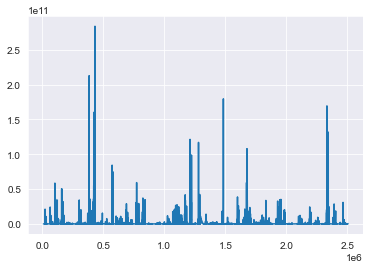

In [57]:
cleaned_df['FLOW'].plot()